In [225]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy.stats import norm

In [226]:
train_raw_df = pd.read_csv('train.csv')
test_raw_df = pd.read_csv('test.csv')

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_10676\788588094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_raw_df['SalePrice'],fit=norm)
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

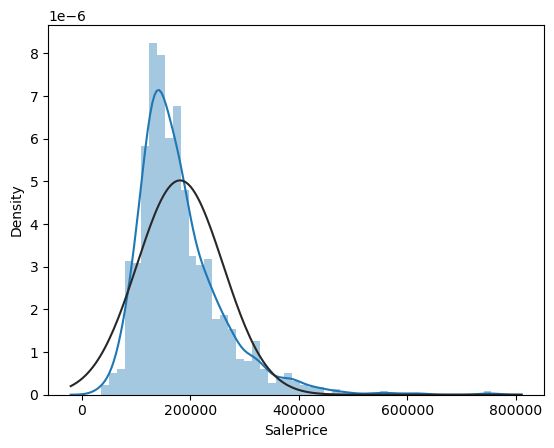

In [227]:
sns.distplot(train_raw_df['SalePrice'],fit=norm)

In [228]:
# train_raw_df["SalePrice"] = np.log1p(train_raw_df["SalePrice"])

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_10676\788588094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_raw_df['SalePrice'],fit=norm)
d:\DownloadDiskD\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

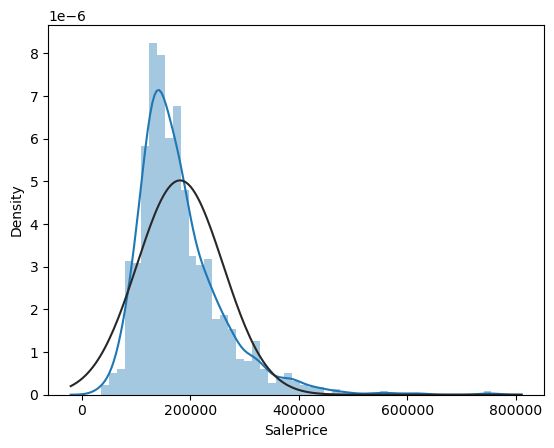

In [229]:
sns.distplot(train_raw_df['SalePrice'],fit=norm)

# feature engineering 
+ nan: filled it with mean and none 
+ num_cat: do as before 
+ cat: onehot
+ num: corr

In [230]:
train_raw_df.drop(['Id'],axis=1,inplace=True)
test_raw_df.drop(['Id'],axis=1,inplace=True)
target_df = train_raw_df['SalePrice']
train_raw_df.drop(['SalePrice'],axis=1,inplace=True)

In [231]:
# first change some numerical cols to string 
num_col_to_string = ['MSSubClass','YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt',]
for col in num_col_to_string:
    train_raw_df[col] = train_raw_df[col].astype(str)
    test_raw_df[col] = test_raw_df[col].astype(str)


In [232]:
numeric_cols = train_raw_df.select_dtypes(exclude=['object']).columns
categorical_cols = train_raw_df.select_dtypes(include=['object']).columns
train_raw_df[numeric_cols] = train_raw_df[numeric_cols].fillna(train_raw_df[numeric_cols].mean())
train_raw_df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [233]:
numeric_cols = test_raw_df.select_dtypes(exclude=['object']).columns
numeric_cols_with_nan = test_raw_df[numeric_cols].columns[test_raw_df[numeric_cols].isna().any()]
test_raw_df[numeric_cols_with_nan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   MasVnrArea    1444 non-null   float64
 2   BsmtFinSF1    1458 non-null   float64
 3   BsmtFinSF2    1458 non-null   float64
 4   BsmtUnfSF     1458 non-null   float64
 5   TotalBsmtSF   1458 non-null   float64
 6   BsmtFullBath  1457 non-null   float64
 7   BsmtHalfBath  1457 non-null   float64
 8   GarageCars    1458 non-null   float64
 9   GarageArea    1458 non-null   float64
dtypes: float64(10)
memory usage: 114.1 KB


In [234]:
numeric_cols = test_raw_df.select_dtypes(exclude=['object']).columns
categorical_cols = test_raw_df.select_dtypes(include=['object']).columns
test_raw_df[numeric_cols] = test_raw_df[numeric_cols].fillna(test_raw_df[numeric_cols].mean())
test_raw_df.isna().sum().sum()

7548

In [235]:
numericalize_cols = {
    'HeatingQC':{"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    'KitchenQual':{"Ex":5, "Gd":4, "TA":3, "Fa":2,np.nan:2},
    'ExterQual':{"Ex":5, "Gd":4, "TA":3, "Fa":2},
    'BsmtQual':{"Ex":5, "Gd":4, "TA":3, "Fa":2,np.nan:2},
    'BsmtCond':{"Ex":5, "Gd":4, "TA":3, "Fa":2,np.nan:1,'Po':1},
    'GarageFinish':{"Fin":3,"RFn":2,"Unf":1,np.nan:1},
    'PavedDrive':{'Y':3,'P':2,'N':1},
    'CentralAir':{'Y':1,'N':0},
}

In [236]:
for col, mapping in numericalize_cols.items():
    train_raw_df[col] = train_raw_df[col].map(mapping)

# Apply mapping to test_raw_df
for col, mapping in numericalize_cols.items():
    test_raw_df[col] = test_raw_df[col].map(mapping)

In [237]:
cate_cols = test_raw_df.select_dtypes(include=['object']).columns
for col in cate_cols:
    train_raw_df[col] = train_raw_df[col].fillna('None')
    test_raw_df[col] = test_raw_df[col].fillna('None')

In [238]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [239]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   object 
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [240]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
categorical_cols = train_raw_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_raw_df.select_dtypes(exclude=['object']).columns.tolist()


In [241]:
print(train_raw_df.isna().sum().sum())
print(test_raw_df.isna().sum().sum())

0
0


In [242]:
preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)
def transform_data_to_dataframe(df, numerical_cols, categorical_cols, preprocessor):
    transformed_data = preprocessor.fit_transform(df)
    # Get transformed numerical data
    transformed_numerical_data = transformed_data[:, :len(numerical_cols)]
    
    # Get transformed categorical data
    transformed_categorical_data = transformed_data[:, len(numerical_cols):]
    
    # Convert to dense arrays if sparse
    transformed_numerical_data = transformed_numerical_data.toarray()
    transformed_categorical_data = transformed_categorical_data.toarray()
    
    # Convert transformed numerical data to DataFrame
    transformed_numerical_df = pd.DataFrame(transformed_numerical_data, columns=numerical_cols)
    
    # Get the feature names generated by OneHotEncoder
    encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
    
    # Convert transformed categorical data to DataFrame with correct column names
    transformed_categorical_df = pd.DataFrame(transformed_categorical_data, columns=encoded_cat_columns)
    
    # Concatenate the numerical and categorical DataFrames
    transformed_df = pd.concat([transformed_numerical_df, transformed_categorical_df], axis=1)
    
    return transformed_df
transform_train_df = transform_data_to_dataframe(train_raw_df, numerical_cols, categorical_cols, preprocessor)
transform_test_df = transform_data_to_dataframe(test_raw_df, numerical_cols, categorical_cols, preprocessor)


<Axes: >

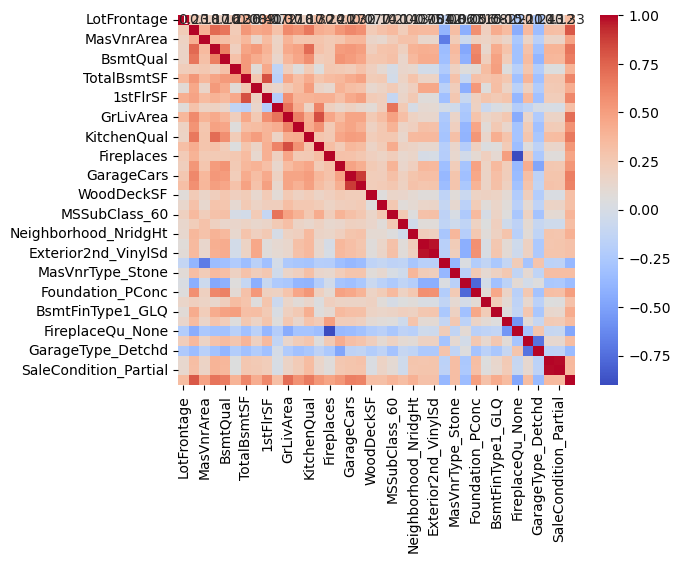

In [243]:
fulled_transform_train_df = pd.concat([transform_train_df, target_df], axis=1)
corr_matrix = fulled_transform_train_df.corr()
corr_threshold  = 0.3
high_corr_cols = corr_matrix[abs(corr_matrix['SalePrice']) > corr_threshold].index
corr_matrix = fulled_transform_train_df[high_corr_cols].corr()
corr_matrix['SalePrice'].sort_values(ascending=False)
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')

In [244]:
# full_train_data = fulled_transform_train_df[high_corr_cols.tolist()]
# full_test_data = transform_test_df[high_corr_cols.drop('SalePrice')]

In [245]:
print(fulled_transform_train_df.shape)
print(transform_test_df.shape)

(1460, 577)
(1459, 558)


# Choosing Model

In [246]:
def evaluate_model(X: np.ndarray, y: np.ndarray, model, model_name):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    print("RMSE on", model_name, np.sqrt(-scores).mean())
    

In [247]:
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVR
scaler = StandardScaler()
normalizer = Normalizer()
X = fulled_transform_train_df.drop('SalePrice', axis=1)
X_test = transform_test_df
y = fulled_transform_train_df['SalePrice']
# X_scaled = scaler.fit_transform(X)
X_scaled =X
lin_reg = LinearRegression()
log_reg = LogisticRegression()
sgd_reg = SGDRegressor()
# svr_linear_reg = SVR(kernel="linear")
# svr_poly_reg = SVR(kernel="poly", degree=3, C=100, epsilon=0.1)
# svr_sigmoid_reg = SVR(kernel="sigmoid", C=100, epsilon=0.1)
# svr_rbf_reg = SVR(kernel='rbf', C=100, epsilon=0.1)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=5,min_samples_split=5)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42,max_depth=5,min_samples_split=5)
evaluate_model(X_scaled, y, lin_reg, "lin_reg")
# evaluate_data(X_scaled, y, log_reg, "log_reg")
evaluate_model(X_scaled, y, sgd_reg, "sgd_reg")
# evaluate_model(X_scaled, y, svr_linear_reg, "svr_linear_reg")
# evaluate_model(X_scaled, y, svr_poly_reg, "svr_poly_reg")
# evaluate_model(X_scaled, y, svr_sigmoid_reg, "svr_sigmoid_reg")
# evaluate_model(X_scaled, y, svr_rbf_reg, "svr_rbf_reg")
evaluate_model(X_scaled, y, rf_reg, "rf_reg")
evaluate_model(X_scaled, y, gb_reg, "gb_reg")

RMSE on lin_reg 907112687084584.8
RMSE on sgd_reg 32297.15746552041
RMSE on rf_reg 32774.74739755735
RMSE on gb_reg 26899.14628234086


In [248]:
X_test 

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.555587,0.363929,-0.751101,0.400766,-0.570108,-0.678102,-0.697174,0.14778,0.063295,0.517348,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.604239,0.897861,-0.054877,0.400766,0.041273,-0.678102,-0.697174,0.14778,1.063392,-0.297903,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.263676,0.809646,-0.751101,-0.497418,-0.570108,-0.678102,0.627275,0.14778,0.773254,-0.297903,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.458284,0.032064,-0.054877,0.400766,-0.456889,-0.678102,-0.697174,0.14778,0.357829,-0.297903,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.244533,-0.971808,1.337571,-0.497418,-0.570108,1.027675,0.627275,0.14778,-0.387298,-0.297903,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.314875,-1.591330,-1.447325,1.298950,-0.570108,-0.678102,-0.697174,0.14778,-0.965376,-0.297903,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,-2.314875,-1.599808,-1.447325,-0.497418,-0.570108,-0.678102,-0.697174,0.14778,-0.411477,-0.297903,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,4.447740,2.055150,-0.751101,1.298950,-0.570108,-0.678102,-0.697174,0.14778,1.724994,-0.297903,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,-0.320147,0.125527,-0.751101,-0.497418,-0.570108,-0.678102,0.627275,0.14778,-0.224645,-0.297903,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [249]:
X_df = pd.DataFrame(X_scaled, columns=fulled_transform_train_df.columns.drop('SalePrice'))
X_test_df = pd.DataFrame(X_test, columns=transform_test_df.columns)
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_df, y)
feat_importances = {"feat_name":X_df.columns, "importance":extra_reg.feature_importances_}
feat_importances = pd.DataFrame(feat_importances).sort_values(by='importance', ascending=False).reset_index(drop=True)
feat_importances['accumulate_importance'] = feat_importances.importance.cumsum()
display(feat_importances)

,feat_name,importance,accumulate_importance
0,OverallQual,2.047965e-01,0.204797
1,GarageCars,1.147752e-01,0.319572
2,ExterQual,1.070447e-01,0.426616
3,KitchenQual,9.472140e-02,0.521338
4,BsmtQual,7.940623e-02,0.600744
...,...,...,...
571,GarageYrBlt_1900.0,1.303770e-08,1.000000
572,Exterior2nd_CBlock,2.685830e-09,1.000000
573,Condition2_RRAn,6.315629e-10,1.000000
574,YearBuilt_1898,0.000000e+00,1.000000


In [250]:
over_90_index = feat_importances[feat_importances['accumulate_importance'] > 0.9].index[0]
top_fts = feat_importances.loc[:over_90_index, 'feat_name'].to_list()

top_fts

['OverallQual',
 'GarageCars',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GrLivArea',
 'FireplaceQu_None',
 'FullBath',
 'Neighborhood_NoRidge',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'BsmtFinSF1',
 'MSSubClass_60',
 'GarageFinish',
 'BedroomAbvGr',
 'LotArea',
 'BsmtExposure_Gd',
 'Fireplaces',
 'YearRemodAdd_1950',
 'BsmtFullBath',
 'GarageType_Attchd',
 'GarageYrBlt_2009.0',
 'CentralAir',
 'MasVnrArea',
 'Exterior1st_VinylSd',
 'MSZoning_RM',
 'OverallCond',
 'SaleType_WD',
 'GarageType_Detchd',
 'BsmtFinType1_GLQ',
 'WoodDeckSF',
 'LandSlope_Gtl',
 'LandContour_Bnk',
 'BldgType_1Fam',
 'Exterior2nd_VinylSd',
 'HalfBath',
 'BsmtExposure_No',
 'OpenPorchSF',
 'LotShape_IR2',
 'BsmtUnfSF',
 'Neighborhood_Crawfor',
 'Exterior1st_BrkFace']

In [251]:
print(X_test_df.columns)
print(X_df.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_New', 'SaleType_None', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=558)
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=576)


In [252]:
final_train_data = X_df[top_fts]
final_test_data = X_test_df[top_fts]
evaluate_model(final_train_data, y, lin_reg, "lin_reg")
evaluate_model(final_train_data, y, sgd_reg, "sgd_reg")
# evaluate_model(final_train_data, y, svr_linear_reg, "svr_linear_reg")
# evaluate_model(final_train_data, y, svr_poly_reg, "svr_poly_reg")
# evaluate_model(final_train_data, y, svr_sigmoid_reg, "svr_sigmoid_reg")
# evaluate_model(final_train_data, y, svr_rbf_reg, "svr_rbf_reg")
evaluate_model(final_train_data, y, rf_reg, "rf_reg")
evaluate_model(final_train_data, y, gb_reg, "gb_reg")

RMSE on lin_reg 32400.01902237523
RMSE on sgd_reg 34471.67904442056
RMSE on rf_reg 31718.23464843466
RMSE on gb_reg 25728.274658969207


# fine tuning

In [253]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(final_train_data, y, test_size=0.2,random_state=42)

In [254]:
# # grid search cv for gradient boosting

# param_grid = {
#     'n_estimators': [300,500],
#     'max_depth': [3,5],
#     'min_samples_split': [10,12],
#     'min_samples_leaf': [4,6],
#     # 'learning_rate': [0.01, 0.1, 0.2]
# }

# gb_reg = GradientBoostingRegressor(random_state=42)
# grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True,verbose=1)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)
# print(np.sqrt(-grid_search.best_score_))

n_estimators: 100, Train MSE: 18377.153275358105, Validation MSE: 28775.851098659994
n_estimators: 150, Train MSE: 14060.549288875314, Validation MSE: 25684.450510502604
n_estimators: 200, Train MSE: 12356.26666231565, Validation MSE: 24940.489483782083
n_estimators: 250, Train MSE: 11420.593694464163, Validation MSE: 24650.297831535994
n_estimators: 300, Train MSE: 10787.082921090028, Validation MSE: 24643.559949118368
n_estimators: 350, Train MSE: 10247.98214591837, Validation MSE: 24672.2360090293
n_estimators: 400, Train MSE: 9752.70042030477, Validation MSE: 24665.234602064702
n_estimators: 450, Train MSE: 9230.214492806992, Validation MSE: 24650.82031709762


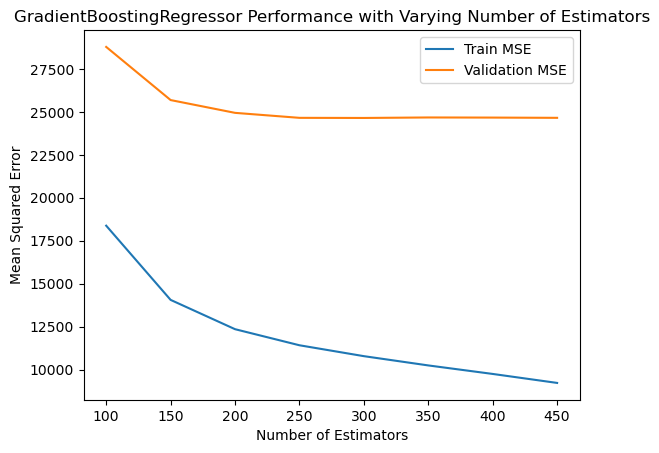

In [255]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

n_estimators_range = range(100,500,50) # Example range of n_estimators values

train_mse = []
val_mse = []

for n_estimators_value in n_estimators_range:
    gb_reg = GradientBoostingRegressor(n_estimators=n_estimators_value,
                                       max_depth=5,
                                       random_state=42,
                                       learning_rate=0.025,
                                       min_samples_leaf=3,
                                       min_samples_split=30,
                                    )
    gb_reg.fit(X_train, y_train)

    y_train_pred = gb_reg.predict(X_train)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mse.append(train_error)

    y_val_pred = gb_reg.predict(X_val)
    val_error = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mse.append(val_error)

    print(f"n_estimators: {n_estimators_value}, Train MSE: {train_error}, Validation MSE: {val_error}")

# Plotting
plt.plot(n_estimators_range, train_mse, label='Train MSE')
plt.plot(n_estimators_range, val_mse, label='Validation MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('GradientBoostingRegressor Performance with Varying Number of Estimators')
plt.legend()
plt.show()


In [256]:
gb_reg = GradientBoostingRegressor(n_estimators=150,
                                       max_depth=5,
                                       random_state=42,
                                       learning_rate=0.025,
                                       min_samples_leaf=3,
                                       min_samples_split=30,)
evaluate_model(final_train_data, y, gb_reg, "gb_reg")

RMSE on gb_reg 26308.532020777835


In [257]:
def predict_to_file(X, model, raw_test_data, name):
    # Predicting
    y_pred = model.predict(X)
    
    # Creating DataFrame with predicted SalePrice
    result_df = pd.DataFrame({'SalePrice': y_pred}, columns=['SalePrice'])
    
    # Adding Id row from raw_test_data
    result_df['Id'] = raw_test_data['Id']
    
    # Reordering columns
    result_df = result_df[['Id', 'SalePrice']]

    # Exporting to CSV
    result_df.to_csv(f'{name}_predict.csv', index=False)

In [258]:
test_raw_df = pd.read_csv('test.csv')

In [262]:
gb_reg.fit(final_train_data, y)
predict_to_file(final_test_data, gb_reg, test_raw_df, "gb_reg")
